In [99]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def pend(y, t, b, c):

    theta, omega = y

    dydt = [omega, -b*omega - c*np.sin(theta)]

    return dydt

In [ ]:
b = 0.25

c = 5.0

In [ ]:
y0 = [np.pi - 0.1, 0.0]

In [ ]:
t = np.linspace(0, 10, 101)

In [ ]:
from scipy.integrate import odeint

sol = odeint(pend, y0, t, args=(b, c))

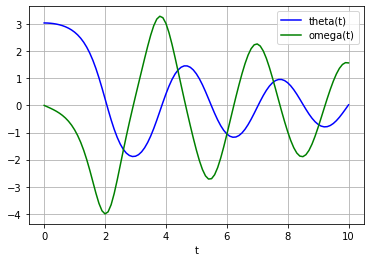

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t, sol[:, 0], 'b', label='theta(t)')

plt.plot(t, sol[:, 1], 'g', label='omega(t)')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

In [100]:
#not working for some reason
def equilibrio(x, t, mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext):
  s, p = x
  ds = ((psi*b1*s)/(teta+psi*b2)) + (p-psi*b1*p)/(teta+psi*b2) -i_ext + (psi*b0 + psi*b1*p_ext - m)/(teta + psi*b2);
  dp = ((mi*teta*b1*s)/(teta + psi*b2)) +((-mi*(teta*b1+b2)*p)/(teta+psi*b2)) - mi*y_n + (mi*teta*b1*p_ext + mi*b0 + mi*b2*m)/(teta + psi*b2);
  return ds,dp

In [101]:
t = np.linspace(0,5, 100)

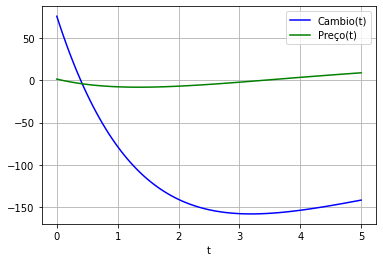

In [142]:
y0 = [76, 1.5]
mi = 0.01
b1 = -10        #negativo?
b2 = 0.1
teta = 0.5
psi = 0.05
b0 = 500
m = 101
y_n = 2000
i_ext = 3
p_ext = 0


solving = odeint(equilibrio,y0, t, args=(mi, b1, b2, teta, psi, b0, m, y_n, i_ext, p_ext))


plt.plot(t, solving[:, 0], 'b', label='Cambio(t)')

plt.plot(t, solving[:, 1], 'g', label='Preço(t)')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

#nao deveria sair isso

In [ ]:
#predador presa

In [2]:
def natural_selection(z, t, b, c, d, e):

    x, y = z

    dxdt = x*b - x*c*y
    dydt = y*d*x - e*y

    return dxdt, dydt

In [46]:
t = np.linspace(0, 30, 10000)

In [4]:
y0 = [90, 2]


In [28]:
b = 2

c = 0.1

d = 0.01

e = 1

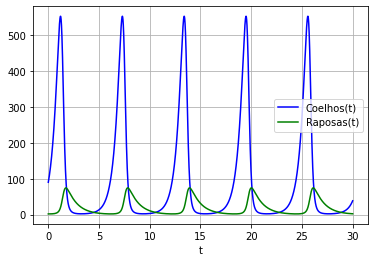

In [47]:
solving = odeint(natural_selection,y0, t, args=(b,c,d,e))


plt.plot(t, solving[:, 0], 'b', label='Coelhos(t)')

plt.plot(t, solving[:, 1], 'g', label='Raposas(t)')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

In [48]:
y1 = np.linspace(0, 100, 100)
y2 = np.linspace(0, 100, 100)

Y1, Y2 = np.meshgrid(y1, y2)

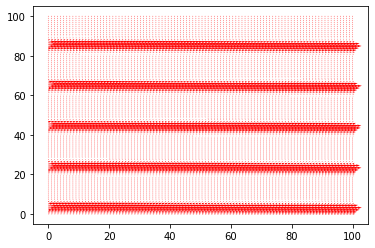

In [49]:
Q = plt.quiver(Y1, Y2, solving[:, 0],solving[:, 1], color='r')
#nao ta dando certo, vou fazer o exemplo

In [50]:
def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

In [51]:
y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

In [52]:
t = 0

In [54]:
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

In [55]:
NI, NJ = Y1.shape #só o tamanho

In [57]:
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]


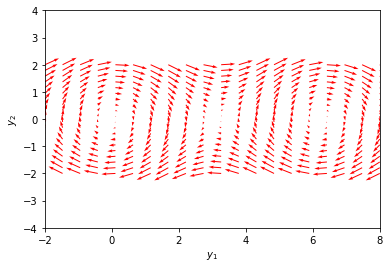

In [64]:
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])
plt.savefig('phase-portrait.png')

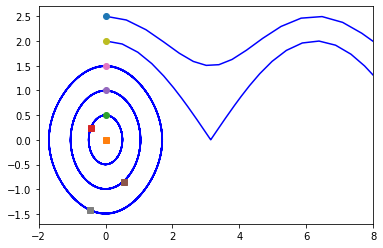

In [65]:
#plottando a solução

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
plt.savefig('phase-portrait-2.png')
plt.show()

In [66]:
#de novo

def natural_selection(z, t, b, c, d, e):

    x, y = z

    dxdt = x*b - x*c*y
    dydt = y*d*x - e*y

    return dxdt, dydt

In [74]:
y1 = np.linspace(0, 100, 10)
y2 = np.linspace(0, 100, 10)

Y1, Y2 = np.meshgrid(y1, y2)
t = np.linspace(0, 30, 100)

In [68]:
#parametros
b = 2

c = 0.1

d = 0.01

e = 1

In [75]:
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
t = 0
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = natural_selection([x, y], t,b,c,d,e)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]


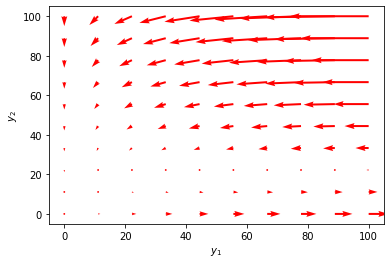

In [76]:
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
#plt.xlim([-2, 8])
#plt.ylim([-4, 4])
plt.savefig('phase-portrait.png')

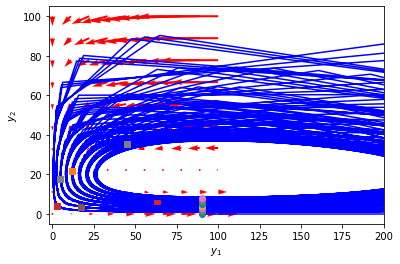

In [98]:
#plottando a solução


Q = plt.quiver(Y1, Y2, u, v, color='r')  
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

for y20 in np.arange(0,9,1):
    t = np.linspace(0, 60, 100)
    y0 = [90, y20]
    ys = odeint(natural_selection,y0, t, args=(b,c,d,e))
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
plt.xlim([-2, 200])
plt.show()

#works